# 1.) Pull in Data and Convert ot Monthly

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [3]:
df.head()

,Adj Close
Date,
1980-12-31,0.117887
1981-01-31,0.097592
1981-02-28,0.091546
1981-03-31,0.084637
1981-04-30,0.098023


In [4]:
# Difference in stock price
df['Diff'] = df['Adj Close'].diff().shift(-1)

# Target
df['Target'] = np.sign(df['Diff'])

df['Premium'] = 0.08 *  df['Adj Close']

# 3.) Pull in X data, normalize and build a LogReg on column 2

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [6]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [7]:
y = df.loc[:"2023-09-30","Target"].copy()

df = df.loc[:'2023-09-30',:].copy()

In [8]:
# Fit a log reg
logreg = LogisticRegression()

logreg .fit(X,y)

LogisticRegression()

# 4.) Add columns, prediction and profits.

In [9]:
y_pred = logreg.predict(X)

In [26]:
df['predictions'] = y_pred

In [27]:
df['Profits'] = 0.

In [28]:
df

,Adj Close,Diff,Target,Premium,predictions,Profits,Profts
Date,,,,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431,-1.0,0.0,NaN
1981-01-31,0.097592,-0.006045,-1.0,0.007807,-1.0,0.0,NaN
1981-02-28,0.091546,-0.006909,-1.0,0.007324,-1.0,0.0,NaN
1981-03-31,0.084637,0.013386,1.0,0.006771,1.0,0.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842,1.0,0.0,0.007842
...,...,...,...,...,...,...,...
2023-05-31,176.778061,16.675507,1.0,14.142245,1.0,0.0,14.142245
2023-06-30,193.453568,2.473389,1.0,15.476285,1.0,0.0,15.476285
2023-07-31,195.926956,-8.304138,-1.0,15.674156,-1.0,0.0,NaN


In [29]:
# True Positive 
df.loc[(df['Target'] == 1) & (df['predictions'] == 1) , 'Profits'] = df['Premium']

# False Positive
df.loc[(df['Target'] == -1) & (df['predictions'] == 1) , 'Profits'] = (100*df['Diff'])+df['Premium']

# 5.) Plot profits over time

[]

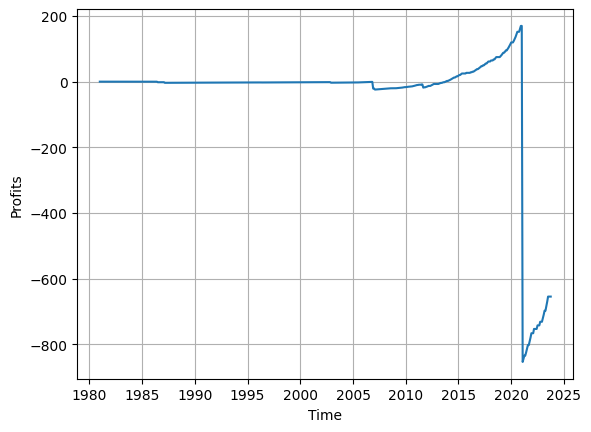

In [30]:
plt.plot(np.cumsum(df['Profits']))
plt.grid()
plt.xlabel('Time')
plt.ylabel('Profits')
plt.plot()

In [24]:
df

,Adj Close,Diff,Target,Premium,predictions,Profits,Profts
Date,,,,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431,-1.0,0.0,NaN
1981-01-31,0.097592,-0.006045,-1.0,0.007807,-1.0,0.0,NaN
1981-02-28,0.091546,-0.006909,-1.0,0.007324,-1.0,0.0,NaN
1981-03-31,0.084637,0.013386,1.0,0.006771,1.0,0.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842,1.0,0.0,0.007842
...,...,...,...,...,...,...,...
2023-05-31,176.778061,16.675507,1.0,14.142245,1.0,0.0,14.142245
2023-06-30,193.453568,2.473389,1.0,15.476285,1.0,0.0,15.476285
2023-07-31,195.926956,-8.304138,-1.0,15.674156,-1.0,0.0,NaN


# 5.5 short write up about how you see your skills valuable to PJ and/or fill Philip Liu

My skills from MQE could value Philip Liu's company in terms of data mining and analyzing from the perspective of professional economics. The abilities we were trained in MQE are integrated skills that could analyze and process the economics and financial data with professional interpretation of the output and numbers in the program. 

# 6.) Create a loop that stores total profits over time

In [15]:
# No need to do

# 7.) What is the optimal threshold and plot the total profits for this model.

In [16]:
# No need to do